In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [364]:
data = pd.read_csv('../Data/train.csv')

In [365]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [366]:
df = data.copy()

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [368]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Как видно из описательных характеристик, датасет содержит выбросы в фичах Rooms, Square, LifeSquare, KitchenSquare. Посмотрим на распределение и попробуем исправить выбросы.

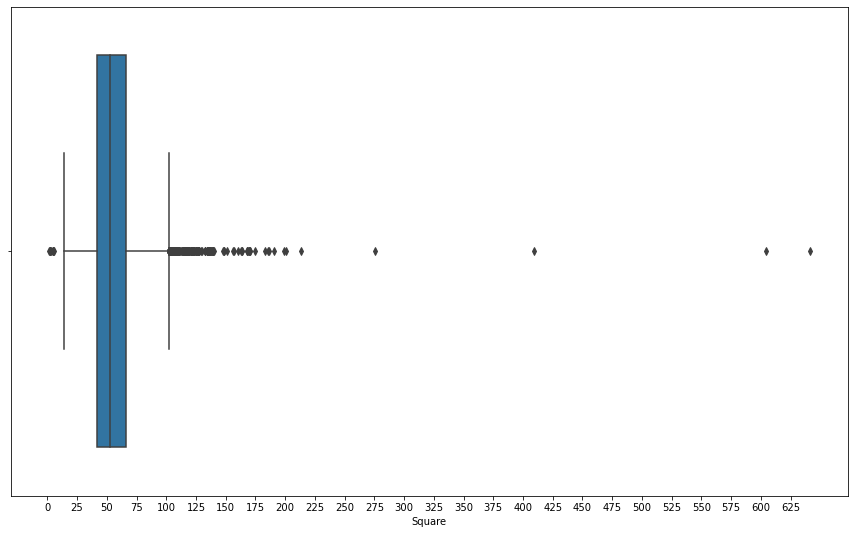

In [369]:
plt.figure(figsize=(15,9))
sns.boxplot(x=df['Square'])
plt.xticks(np.arange(0, 650, 25))
plt.show()

В принципе, квартиры с большой площадью существуют, однако они стоят обычно дорого, поэтому отбросим все дешевые квартиры с большой площадью.

In [370]:
df.loc[df['Square'] > 250]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.882666
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562


In [371]:
IQR = df['Square'].quantile(0.75)-df['Square'].quantile(0.25)
quantile_max = df['Square'].quantile(0.75) + 1.5*IQR
quantile_min = df['Square'].quantile(0.25) - 1.5*IQR

In [372]:
df_loc_square = df.loc[df['Square'] < quantile_max].loc[df['Square'] > 25]
min_price_square = (df_loc_square['Price']/df_loc_square['Square']).min()

In [373]:
df_outliers = df.loc[df['Square'] > quantile_max]
df_outliers['min_price'] = df_outliers.loc[:, 'Square']*min_price_square
df_outliers = df_outliers.loc[df_outliers['min_price']>df_outliers['Price']]

<ipython-input-373-6969144e1a07>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers['min_price'] = df_outliers.loc[:, 'Square']*min_price_square


In [374]:
df = df.drop(df_outliers.index, axis=0)

Так же отбросим все наблюдения с площадью менее 25.

In [375]:
index_to_drop = df.loc[df['Square'] < 25].index

In [376]:
df = df.drop(index_to_drop, axis=0)

В переменной Healthcare_1 довольно много пропусков, поэтому отбросим и ее тоже.

In [377]:
df = df.drop('Healthcare_1', axis=1)

In [378]:
df.loc[df['Rooms']>6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.270863


Судя по площади, это однокомнатные квартиры.

In [379]:
df['Rooms'][df.loc[df['Rooms']>6].index] = 1

<ipython-input-379-4cd2c92d43df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rooms'][df.loc[df['Rooms']>6].index] = 1


In [380]:
df.loc[df['Rooms']<1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,0,0,B,212864.799112
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,0,1,B,219281.918007


In [381]:
mean_square = df['Square'].mean()

In [382]:
df[['Square', 'Rooms']] = df[['Square', 'Rooms']].apply(lambda x: x if x['Rooms'] != 0 else \
                                                        pd.Series({'Square': x['Square'], 'Rooms': np.ceil(x['Square']/mean_square)}), axis=1)

Теперь посмотрим на корреляции.

<AxesSubplot:>

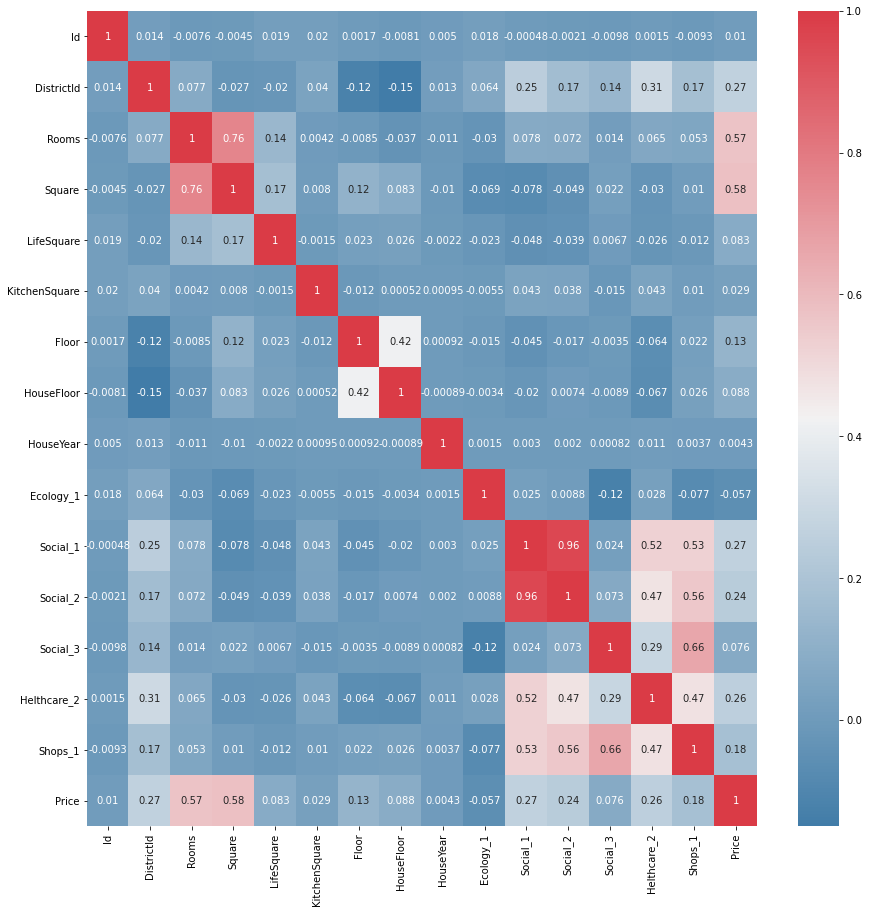

In [383]:
plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap=cmap)

Попробуем исключить выбросы в переменных LifeSquare и KitchenSquare и вновь посмотреть на корреляции, чтобы принять решение о включении данных переменных в модель.

In [384]:
df_2 = df.copy()

In [385]:
df_2 = df_2.drop(df_2.loc[df['LifeSquare'] > df_2['Square'].max()].index, axis=0)

In [386]:
df_2 = df_2.drop(df_2.loc[df_2['KitchenSquare'] > df_2['Square'].max()].index, axis=0)

<AxesSubplot:>

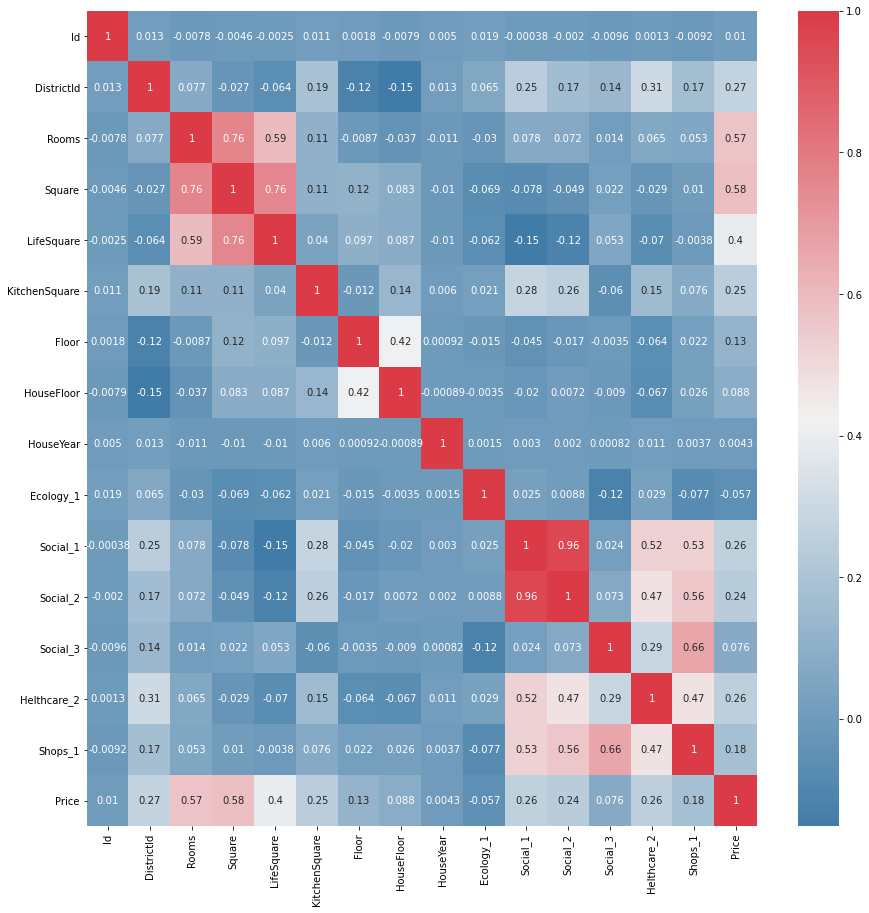

In [387]:
plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(df_2.corr(), annot=True, cmap=cmap)

Как видим корреляция с целевой переменной сильно увеличилась. Однако LifeSquare имеет сильную корреляцию с Square и имеет пропущенные значения. Не будем включать эту фичу в модель. А вот KitchenSquare имеет смысл обработать и включить в модель

In [388]:
df['KitchenSquare'] = df['KitchenSquare'].replace(0, 1)

In [389]:
IQR = df['KitchenSquare'].quantile(0.75)-df['KitchenSquare'].quantile(0.25)
quantile_max = df['KitchenSquare'].quantile(0.75) + 1.5*IQR
quantile_min = df['KitchenSquare'].quantile(0.25) - 1.5*IQR

In [390]:
df.loc[df['KitchenSquare'] > quantile_max].loc[df['Square']-df['KitchenSquare'] < 10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
227,16395,2,3.0,79.722243,44.731219,72.0,12,16.0,1987,0.130618,B,B,39,10418,9,1,9,B,370148.625285
551,1315,6,1.0,48.128114,45.023531,48.0,21,1.0,2013,0.243205,B,B,5,1564,0,0,0,B,146950.912410
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,0,0,A,108337.484207
1077,9690,27,1.0,40.081042,37.834964,37.0,18,19.0,2019,0.211401,B,B,9,1892,0,0,1,B,93218.650461
1369,2371,27,2.0,68.841073,64.234956,66.0,4,2.0,2014,0.017647,B,B,2,469,0,0,0,B,189244.249909
1455,12507,54,2.0,79.810535,79.578961,78.0,10,15.0,2014,0.006076,B,B,30,5285,0,6,6,B,438708.707579
1860,4265,161,2.0,53.216778,32.644859,53.0,7,17.0,1994,0.000699,B,B,14,3369,24,0,3,B,261125.669724
2916,12390,72,3.0,97.490674,99.323558,96.0,22,25.0,2019,0.210473,B,B,11,2398,2,3,0,B,445074.956552
2969,7441,62,3.0,114.734473,112.589083,112.0,3,3.0,2015,0.072158,B,B,2,629,1,0,0,A,315245.521059
3379,16781,27,1.0,36.138409,36.710539,36.0,19,19.0,2017,0.072158,B,B,2,629,1,0,0,A,131742.536281


In [391]:
kitchen_index = df.loc[df['KitchenSquare'] > quantile_max].loc[df['Square']-df['KitchenSquare'] < 10].index

In [392]:
df['KitchenSquare'][kitchen_index] = 6

<ipython-input-392-6c4799ff5fd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['KitchenSquare'][kitchen_index] = 6


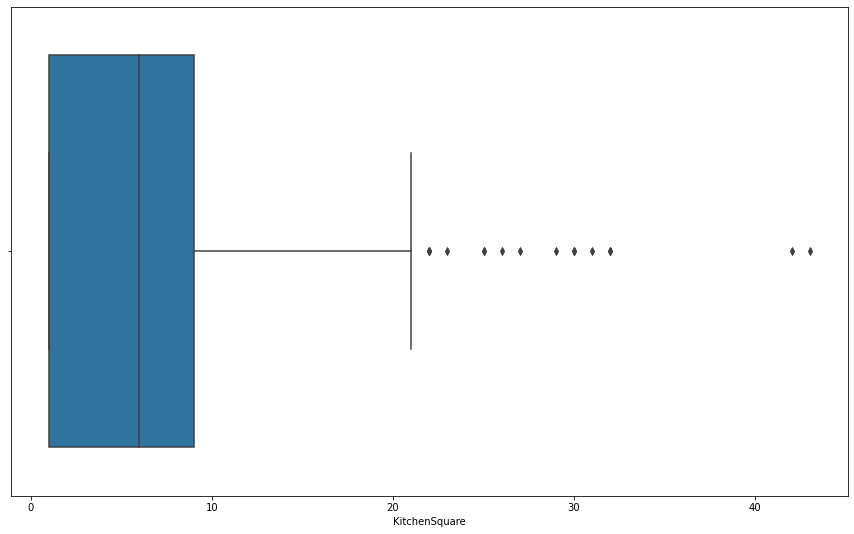

In [393]:
plt.figure(figsize=(15,9))
sns.boxplot(x=df['KitchenSquare'])
#plt.xticks(np.arange(0, 650, 25))
plt.show()

In [394]:
df = df.drop('LifeSquare', axis=1)

<AxesSubplot:>

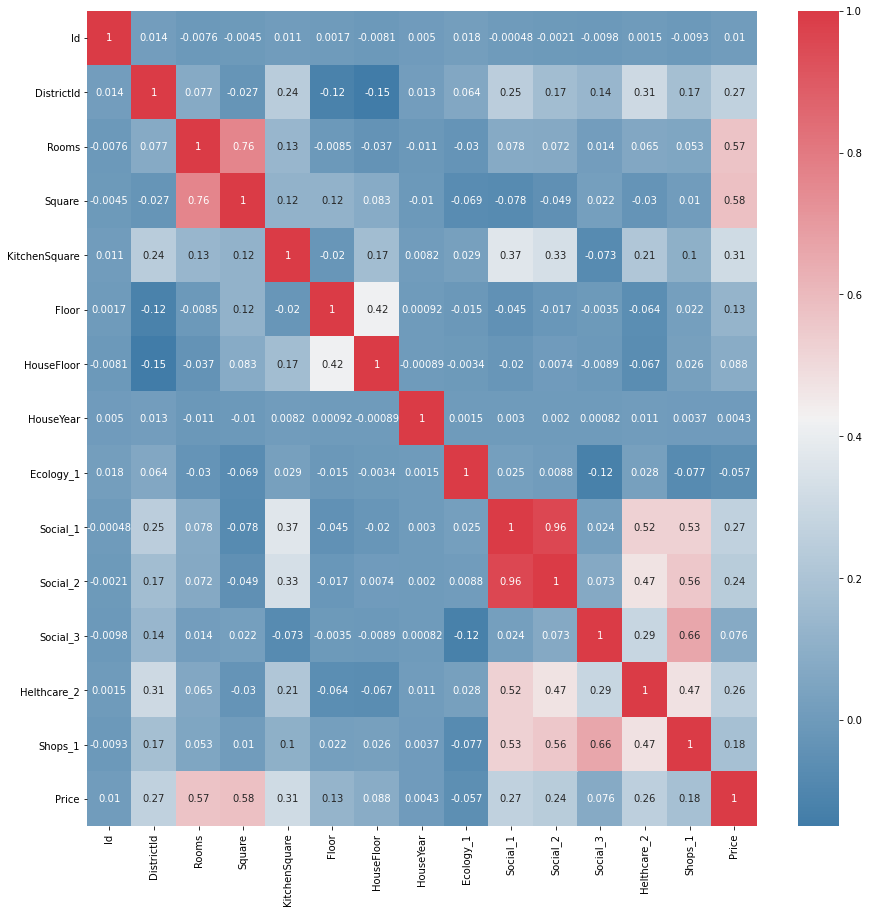

In [395]:
plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap=cmap)

Так же мы видим что Social_1 и Social_2 сильно коррелируют друг с другом. Оставим только Social_1, так как он имеет большую корреляцию с нашей целевой переменной.

In [396]:
df = df.drop('Social_2', axis=1)

Исправим Year.

In [397]:
df.loc[df['HouseYear']>2020]

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,9.0,9,12.0,20052011,0.136330,B,B,30,10,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,5.0,4,9.0,4968,0.319809,B,B,25,16,5,8,B,243028.603096


In [398]:
df['HouseYear'] = df['HouseYear'].replace(20052011, 2011)

In [399]:
df['HouseYear'] = df['HouseYear'].replace(4968, df['HouseYear'].median())

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9963 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             9963 non-null   int64  
 1   DistrictId     9963 non-null   int64  
 2   Rooms          9963 non-null   float64
 3   Square         9963 non-null   float64
 4   KitchenSquare  9963 non-null   float64
 5   Floor          9963 non-null   int64  
 6   HouseFloor     9963 non-null   float64
 7   HouseYear      9963 non-null   int64  
 8   Ecology_1      9963 non-null   float64
 9   Ecology_2      9963 non-null   object 
 10  Ecology_3      9963 non-null   object 
 11  Social_1       9963 non-null   int64  
 12  Social_3       9963 non-null   int64  
 13  Helthcare_2    9963 non-null   int64  
 14  Shops_1        9963 non-null   int64  
 15  Shops_2        9963 non-null   object 
 16  Price          9963 non-null   float64
dtypes: float64(6), int64(8), object(3)
memory usage: 1.7

In [401]:
df.loc[df['Floor']>df['HouseFloor']]

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_3,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,1.0,14,0.0,1977,0.075779,B,B,6,3,0,2,B,221244.156664
14,10953,27,1.0,53.769097,1.0,5,4.0,1977,0.072158,B,B,2,1,0,0,A,140647.565937
16,2119,27,2.0,49.360648,5.0,6,5.0,1983,0.051815,B,B,5,0,0,0,B,117000.381287
21,11935,27,2.0,64.711835,1.0,15,1.0,1977,0.211401,B,B,9,0,0,1,B,127200.026511
23,6641,54,3.0,118.907612,1.0,2,0.0,1977,0.006076,B,B,30,0,6,6,B,571069.052600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,2237,52,3.0,64.074977,6.0,11,9.0,1983,0.371149,B,B,34,1,2,5,B,226434.880156
9985,16159,27,1.0,38.968338,1.0,10,1.0,1977,0.211401,B,B,9,0,0,1,B,95529.569405
9989,4145,96,3.0,90.055233,11.0,26,24.0,2005,0.041116,B,B,53,4,1,4,B,441108.911237
9991,11553,3,3.0,101.622794,12.0,18,17.0,2000,0.265089,B,B,37,0,3,2,B,212883.501504


In [402]:
df[['Floor', 'HouseFloor']] = df[['Floor', 'HouseFloor']].apply(lambda x: x if x['Floor']<x['HouseFloor'] else \
                                                               pd.Series({'Floor': x['Floor'], 'HouseFloor': x['Floor']}), axis=1)

In [403]:
df.loc[df['HouseFloor']==0]

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_3,Helthcare_2,Shops_1,Shops_2,Price


In [404]:
df.describe()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_3,Helthcare_2,Shops_1,Price
count,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000
mean,8381.473452,50.380006,1.890495,56.309072,5.794841,8.531868,13.445448,1984.894309,0.118686,24.677005,8.039044,1.316672,4.231456,214323.882646
std,4858.006218,43.590550,0.812565,19.023608,3.901115,5.234269,6.086154,18.414460,0.119058,17.539128,23.836343,1.492668,4.807520,92744.604939
min,0.000000,0.000000,1.000000,25.410513,1.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4170.500000,20.000000,1.000000,41.825482,1.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,0.000000,0.000000,1.000000,154163.191685
50%,8391.000000,35.000000,2.000000,52.585334,6.000000,7.000000,14.000000,1977.000000,0.075424,25.000000,2.000000,1.000000,3.000000,192435.878953
75%,12589.500000,75.000000,2.000000,65.931853,9.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,5.000000,2.000000,6.000000,249442.269517
max,16798.000000,209.000000,6.000000,275.645284,43.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,141.000000,6.000000,23.000000,633233.466570


In [405]:
cat_feats = ['Ecology_2', 'Ecology_3', 'Shops_2']

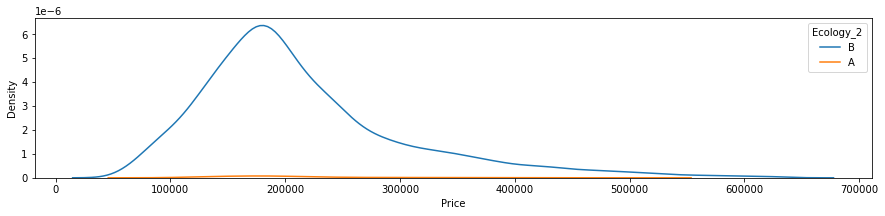

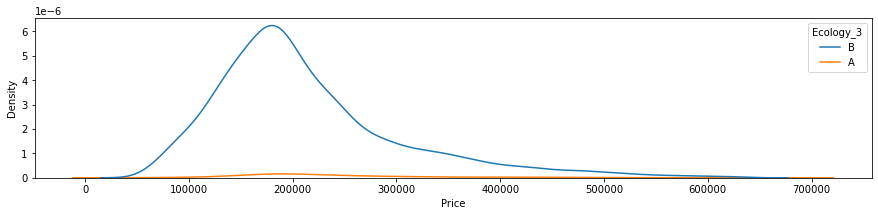

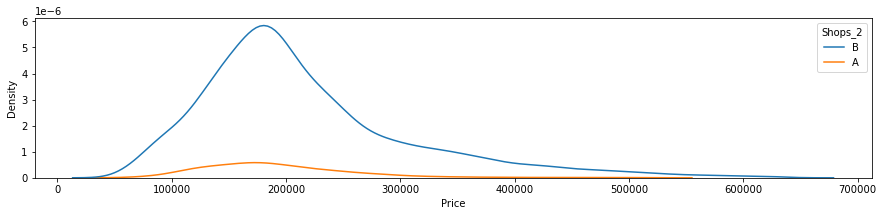

In [406]:
for i, value in enumerate(cat_feats):
    plt.figure(figsize=(15,10))
    plt.subplot(3, 1, i+1)
    sns.kdeplot(data=df, x='Price', hue=value)

In [407]:
ids = ['Id', 'DistrictId']

In [408]:
num_feats = [x for x in df.columns if x not in cat_feats+ids]

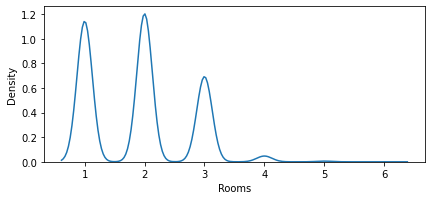

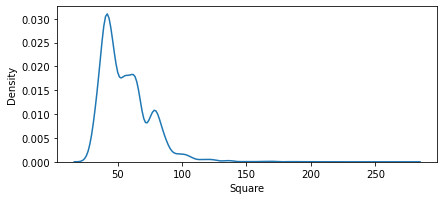

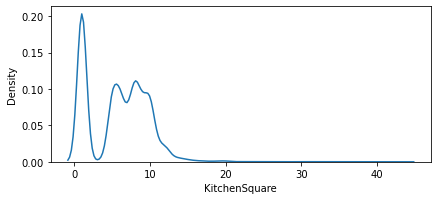

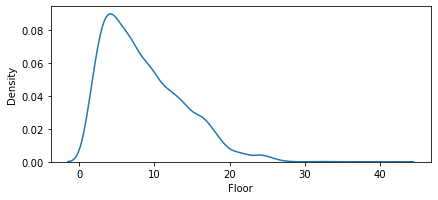

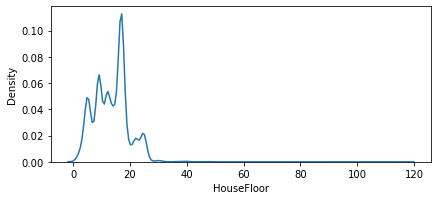

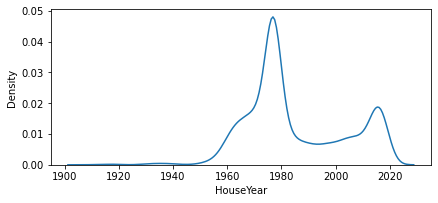

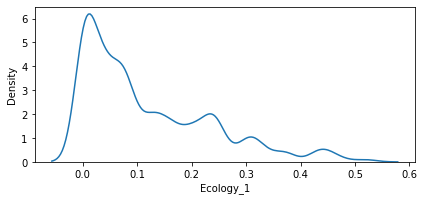

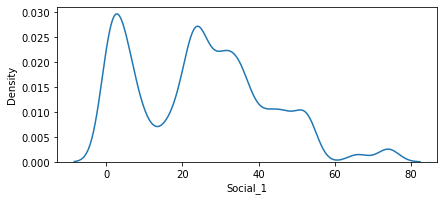

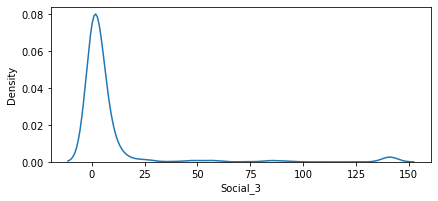

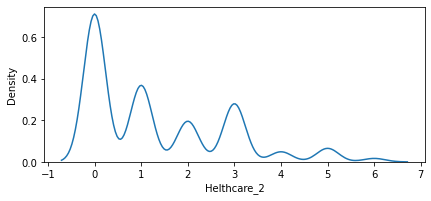

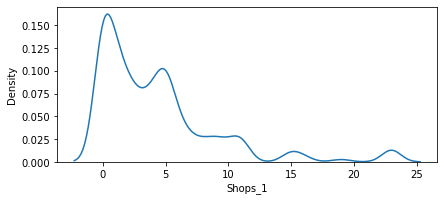

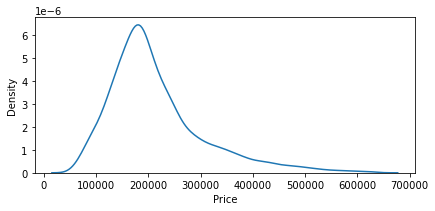

In [409]:
for i, value in enumerate(num_feats):
    plt.figure(figsize=(15, 20))
    plt.subplot(len(num_feats)//2, 2, i+1)
    sns.kdeplot(data=df, x=value)

Теперь сгенерируем новые фичи для различных моделей.

In [410]:
from sklearn.model_selection import train_test_split

In [411]:
X = df.drop(['Id', 'Price'], axis=1)
y = df['Price']

In [412]:
X.head()

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_3,Helthcare_2,Shops_1,Shops_2
0,35,2.0,47.981561,6.0,7.0,9.0,1969,0.089040,B,B,33,5,0,11,B
1,41,3.0,65.683640,8.0,7.0,9.0,1978,0.000070,B,B,46,1,1,16,B
2,53,2.0,44.947953,1.0,8.0,12.0,1968,0.049637,B,B,34,0,1,3,B
3,58,2.0,53.352981,9.0,8.0,17.0,1977,0.437885,B,B,23,3,0,5,B
4,99,1.0,39.649192,7.0,11.0,12.0,1976,0.012339,B,B,35,1,2,4,B


In [413]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [414]:
def districtid_feats(df, groupby_feat, feat_to_group, df_source, mode='train'):
    feat_name = 'mean_' + feat_to_group +'_by_' + groupby_feat
    stats = df_source.groupby(['DistrictId', groupby_feat], as_index=False)[[feat_to_group]].mean()\
            .rename(columns={feat_to_group: feat_name})
    result = df.copy()
    result = pd.merge(result, stats, on=['DistrictId', groupby_feat], how='left')
    if mode=='test':
        result[feat_name].fillna(df_source[feat_name].mean(), inplace=True)
    return result

In [415]:
for col in num_feats:
    print(f'{col}: {df[col].nunique()}')

Rooms: 6
Square: 9963
KitchenSquare: 32
Floor: 33
HouseFloor: 43
HouseYear: 95
Ecology_1: 129
Social_1: 51
Social_3: 30
Helthcare_2: 7
Shops_1: 16
Price: 9963


In [416]:
num_feats = [x for x in num_feats if x != 'Price']

In [417]:
groupby_feats = [x for x in num_feats if df[x].nunique()<100]

In [418]:
feat_to_group = ['Square', 'KitchenSquare', 'Ecology_1', 'Social_1', 'Social_3', 'Helthcare_2', 'Shops_1']

In [419]:
X_train_feats = X_train.copy()

In [420]:
for g_feat in groupby_feats:
    for feat_tg in feat_to_group:
        if feat_tg == g_feat:
            continue
        X_train_feats = districtid_feats(X_train_feats, g_feat, feat_tg, X_train_feats)

In [421]:
X_train_feats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6974 entries, 0 to 6973
Data columns (total 73 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DistrictId                         6974 non-null   int64  
 1   Rooms                              6974 non-null   float64
 2   Square                             6974 non-null   float64
 3   KitchenSquare                      6974 non-null   float64
 4   Floor                              6974 non-null   float64
 5   HouseFloor                         6974 non-null   float64
 6   HouseYear                          6974 non-null   int64  
 7   Ecology_1                          6974 non-null   float64
 8   Ecology_2                          6974 non-null   object 
 9   Ecology_3                          6974 non-null   object 
 10  Social_1                           6974 non-null   int64  
 11  Social_3                           6974 non-null   int64

In [422]:
from sklearn.decomposition import PCA

In [423]:
from sklearn.preprocessing import StandardScaler

In [424]:
scaler = StandardScaler()
pca_ = PCA(n_components=2)

In [425]:
def add_pca_feats(df, scaler, pca_, num_feats, mode='train'):
    X_to_pca = df[num_feats]
    if mode == 'train':
        X_to_pca_scaled = scaler.fit_transform(X_to_pca)
        X_pca = pca_.fit_transform(X_to_pca_scaled)
    elif mode =='test':
        X_to_pca_scaled = scaler.transform(X_to_pca)
        X_pca = pca_.transform(X_to_pca_scaled)
    result = df.copy()
    result['pca_1'] = X_pca[:, 0]
    result['pca_2'] = X_pca[:, 1]
    return result

In [426]:
X_train_feats = add_pca_feats(X_train_feats, scaler, pca_, num_feats)

In [427]:
X_train_feats[num_feats].isin([0]).any()

Rooms            False
Square           False
KitchenSquare    False
Floor            False
HouseFloor       False
HouseYear        False
Ecology_1         True
Social_1          True
Social_3          True
Helthcare_2       True
Shops_1           True
dtype: bool

In [428]:
feats_to_log = ['Square', 'KitchenSquare']

In [429]:
def add_log_feats(df, feats_to_log):
    result = df.copy()
    for feat in feats_to_log:
        result['log_' + feat] = result[feat].apply(lambda x: np.log(x))
    return result

In [430]:
X_train_feats = add_log_feats(X_train_feats, feats_to_log)

In [431]:
X_train_feats[num_feats].max()

Rooms               5.000000
Square            275.645284
KitchenSquare      43.000000
Floor              42.000000
HouseFloor         99.000000
HouseYear        2020.000000
Ecology_1           0.521867
Social_1           74.000000
Social_3          141.000000
Helthcare_2         6.000000
Shops_1            23.000000
dtype: float64

In [432]:
feat_to_exp = ['Ecology_1', 'Helthcare_2']

In [433]:
def add_exp_feats(df, feats_to_exp):
    result = df.copy()
    for feat in feats_to_exp:
        result['exp_' + feat] = result[feat].apply(lambda x: np.exp(x))
    return result

In [434]:
X_train_feats = add_exp_feats(X_train_feats, feat_to_exp)

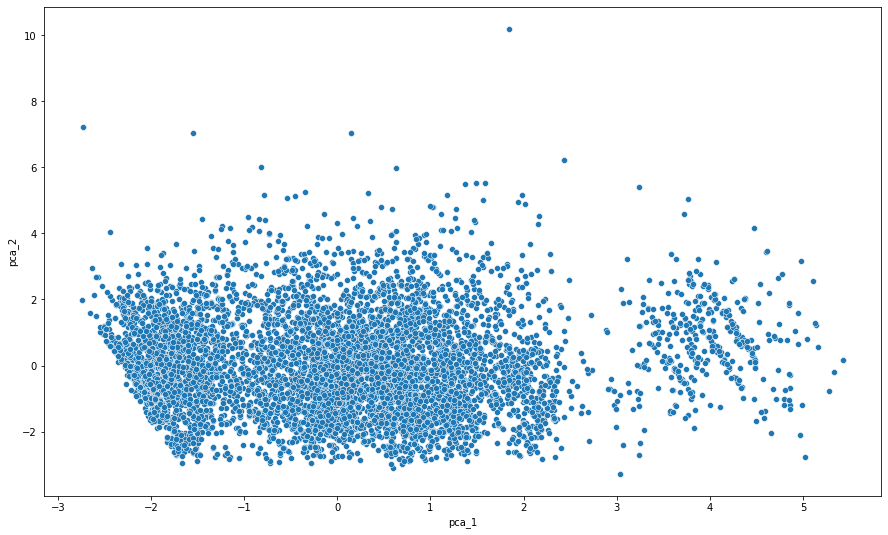

In [435]:
plt.figure(figsize=(15,9))
sns.scatterplot(data=X_train_feats[['pca_1', 'pca_2']], x='pca_1', y='pca_2')
plt.show()

In [436]:
from sklearn.cluster import KMeans

In [437]:
kmeans = KMeans(n_clusters=3, random_state = 42)

In [438]:
X_cluster = kmeans.fit_predict(X_train_feats[['pca_1', 'pca_2']])

In [439]:
X_train_with_cluster = X_train_feats[['pca_1', 'pca_2']].copy()
X_train_with_cluster['cluster'] = X_cluster

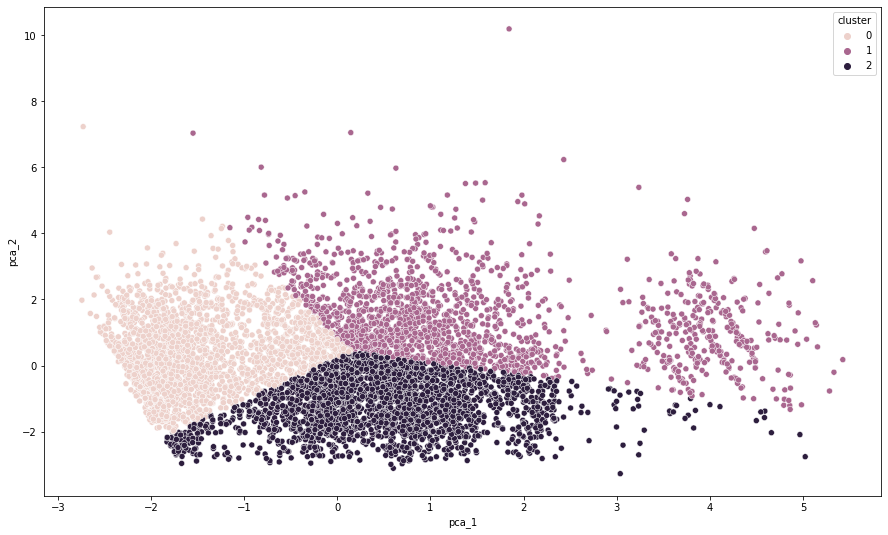

In [440]:
plt.figure(figsize=(15,9))
sns.scatterplot(data=X_train_with_cluster, x='pca_1', y='pca_2', hue='cluster')
plt.show()

In [441]:
def add_cluster_feats(df, estimator, mode='train'):
    X = df[['pca_1', 'pca_2']].copy()
    if mode == 'train':
        X_cluster = estimator.fit_predict(X)
    elif mode == 'test':
        X_cluster = estimator.predict(X)
    result = df.copy()
    result['cluster'] = X_cluster
    return result

In [442]:
X_train_feats['cluster'] = X_cluster

In [443]:
X_train_feats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6974 entries, 0 to 6973
Data columns (total 80 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DistrictId                         6974 non-null   int64  
 1   Rooms                              6974 non-null   float64
 2   Square                             6974 non-null   float64
 3   KitchenSquare                      6974 non-null   float64
 4   Floor                              6974 non-null   float64
 5   HouseFloor                         6974 non-null   float64
 6   HouseYear                          6974 non-null   int64  
 7   Ecology_1                          6974 non-null   float64
 8   Ecology_2                          6974 non-null   object 
 9   Ecology_3                          6974 non-null   object 
 10  Social_1                           6974 non-null   int64  
 11  Social_3                           6974 non-null   int64

In [445]:
def add_div_feats(df, num_denum_pairs):
    result  = df.copy()
    for num_f, denom_f in num_denum_pairs:
        feat_name = num_f + '_div_' + denom_f
        result[feat_name] = result[num_f]/result[denom_f]
    return result

In [447]:
num_feats

['Rooms',
 'Square',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_3',
 'Helthcare_2',
 'Shops_1']

In [448]:
nd_pairs = [('Square', 'Rooms'), ('KitchenSquare', 'Square'), ('KitchenSquare', 'Rooms'), ('Floor', 'HouseFloor')]

In [449]:
X_train_feats = add_div_feats(X_train_feats, nd_pairs)

In [464]:
X_train_feats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6974 entries, 0 to 6973
Data columns (total 84 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DistrictId                         6974 non-null   int64  
 1   Rooms                              6974 non-null   float64
 2   Square                             6974 non-null   float64
 3   KitchenSquare                      6974 non-null   float64
 4   Floor                              6974 non-null   float64
 5   HouseFloor                         6974 non-null   float64
 6   HouseYear                          6974 non-null   int64  
 7   Ecology_1                          6974 non-null   float64
 8   Ecology_2                          6974 non-null   object 
 9   Ecology_3                          6974 non-null   object 
 10  Social_1                           6974 non-null   int64  
 11  Social_3                           6974 non-null   int64

In [465]:
y_train = y_train.reset_index(drop=True)

In [466]:
train_data_with_feats = pd.concat((X_train_feats, y_train),axis=1)

In [467]:
train_data_with_feats.to_csv('../Data/train_data_with_feats.csv', index=False)

In [469]:
X_test_feats = X_test.copy()

for g_feat in groupby_feats:
    for feat_tg in feat_to_group:
        if feat_tg == g_feat:
            continue
        X_test_feats = districtid_feats(X_test_feats, g_feat, feat_tg, X_train_feats, mode='test')
X_test_feats = add_pca_feats(X_test_feats, scaler, pca_, num_feats, mode='test')
X_test_feats = add_log_feats(X_test_feats, feats_to_log)
X_test_feats = add_exp_feats(X_test_feats, feat_to_exp)
X_test_feats = add_cluster_feats(X_test_feats, kmeans, mode='test')
X_test_feats = add_div_feats(X_test_feats, nd_pairs)

In [470]:
X_test_feats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2989 entries, 0 to 2988
Data columns (total 84 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DistrictId                         2989 non-null   int64  
 1   Rooms                              2989 non-null   float64
 2   Square                             2989 non-null   float64
 3   KitchenSquare                      2989 non-null   float64
 4   Floor                              2989 non-null   float64
 5   HouseFloor                         2989 non-null   float64
 6   HouseYear                          2989 non-null   int64  
 7   Ecology_1                          2989 non-null   float64
 8   Ecology_2                          2989 non-null   object 
 9   Ecology_3                          2989 non-null   object 
 10  Social_1                           2989 non-null   int64  
 11  Social_3                           2989 non-null   int64

In [471]:
y_test = y_test.reset_index(drop=True)

In [472]:
test_data_with_feats = pd.concat((X_test_feats, y_test), axis=1)
test_data_with_feats.to_csv('../Data/test_data_with_feats.csv', index=False)

Для построения линейной модели можно так же добавить полиномиальные фичи

In [473]:
from sklearn.preprocessing import PolynomialFeatures

In [474]:
def add_polynomial_feats(df, num_feats, degree):
    result = df[num_feats].copy()
    poly = PolynomialFeatures(degree=degree)
    feat_names = result.columns
    result = poly.fit_transform(result)
    new_feat_names = poly.get_feature_names(feat_names)
    result = pd.DataFrame(result, columns=new_feat_names)
    rest_of_df = df[[x for x in df.columns if x not in num_feats]].copy()
    result = result.reset_index(drop=True)
    rest_of_df = rest_of_df.reset_index(drop=True)
    result = pd.concat((result, rest_of_df), axis=1)
    return result

In [475]:
X_train_feats_p2 = add_polynomial_feats(X_train_feats, num_feats, 2)
X_test_feats_p2 = add_polynomial_feats(X_test_feats, num_feats, 2)

In [476]:
train_data_with_feats_p2 = pd.concat((X_train_feats_p2, y_train), axis=1)
test_data_with_feats_p2 = pd.concat((X_test_feats_p2, y_test), axis=1)

In [477]:
train_data_with_feats_p2.to_csv('../Data/train_data_with_feats_p2.csv', index=False)
test_data_with_feats_p2.to_csv('../Data/test_data_with_feats_p2.csv', index=False)

In [478]:
X_train_feats_p3 = add_polynomial_feats(X_train_feats, num_feats, 3)
X_test_feats_p3 = add_polynomial_feats(X_test_feats, num_feats, 3)

In [479]:
train_data_with_feats_p3 = pd.concat((X_train_feats_p3, y_train), axis=1)
test_data_with_feats_p3 = pd.concat((X_test_feats_p3, y_test), axis=1)

In [480]:
train_data_with_feats_p3.to_csv('../Data/train_data_with_feats_p3.csv', index=False)
test_data_with_feats_p3.to_csv('../Data/test_data_with_feats_p3.csv', index=False)

In [ ]:
cat_feats = ['Ecology_2', 'Ecology_3', 'Shops_2']